# How does weather affect the amount of people using the station? #

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

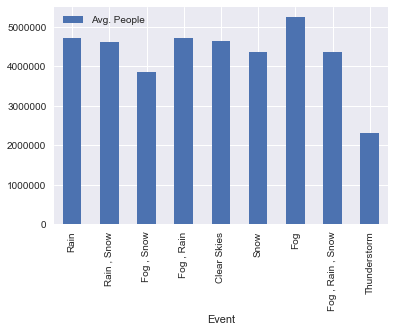

In [81]:
# get the data
overall = [('Rain', 4715522L),
             ('Rain , Snow', 4619726),
             ('Fog , Snow', 3844535),
             ('Fog , Rain', 4722427),
             ('Clear Skies', 4639989),
             ('Snow', 4354041),
             ('Fog', 5243310),
             ('Fog , Rain , Snow', 4365354),
             ('Thunderstorm', 2311591)]

# convert to dataframe
dfOverall = pd.DataFrame(overall)
dfOverall.columns = ['Event','Avg. People']
dfOverall.plot(x='Event', y='Avg. People', kind='bar')

In [128]:
dayweek =  [(('Friday', 'Clear Skies'), 1147607261),
 (('Friday', 'Fog , Rain'), 100895970),
 (('Friday', 'Fog , Rain , Snow'), 16036017),
 (('Friday', 'Fog , Snow'), 26094128),
 (('Friday', 'Rain'), 339233210),
 (('Friday', 'Rain , Snow'), 5548018),
 (('Friday', 'Snow'), 36474706),
 (('Monday', 'Clear Skies'), 1063972752),
 (('Monday', 'Fog'), 16086797),
 (('Monday', 'Fog , Rain'), 90753281),
 (('Monday', 'Fog , Rain , Snow'), 18767182),
 (('Monday', 'Fog , Snow'), 7936418),
 (('Monday', 'Rain'), 336108880),
 (('Monday', 'Rain , Snow'), 30425522),
 (('Monday', 'Snow'), 39979332),
 (('Saturday', 'Clear Skies'), 663604977),
 (('Saturday', 'Fog , Rain'), 24319362),
 (('Saturday', 'Fog , Rain , Snow'), 14357643),
 (('Saturday', 'Fog , Snow'), 18822966),
 (('Saturday', 'Rain'), 201335326),
 (('Saturday', 'Rain , Snow'), 5952711),
 (('Saturday', 'Snow'), 33980296),
 (('Sunday', 'Clear Skies'), 545105697),
 (('Sunday', 'Fog'), 2413018),
 (('Sunday', 'Fog , Rain'), 38022551),
 (('Sunday', 'Fog , Snow'), 7172208),
 (('Sunday', 'Rain'), 155399326),
 (('Sunday', 'Rain , Snow'), 7553347),
 (('Sunday', 'Snow'), 24044069),
 (('Sunday', 'Thunderstorm'), 2311591),
 (('Thursday', 'Clear Skies'), 1084634111),
 (('Thursday', 'Fog'), 5580686),
 (('Thursday', 'Fog , Rain'), 109478823),
 (('Thursday', 'Fog , Rain , Snow'), 9184215),
 (('Thursday', 'Fog , Snow'), 8816932),
 (('Thursday', 'Rain'), 436369678),
 (('Thursday', 'Rain , Snow'), 5424313),
 (('Thursday', 'Snow'), 52368436),
 (('Tuesday', 'Clear Skies'), 1051569783),
 (('Tuesday', 'Fog'), 15859524),
 (('Tuesday', 'Fog , Rain'), 75755521),
 (('Tuesday', 'Fog , Rain , Snow'), 5810331),
 (('Tuesday', 'Fog , Snow'), 23044047),
 (('Tuesday', 'Rain'), 486619892),
 (('Tuesday', 'Rain , Snow'), 32995678),
 (('Tuesday', 'Snow'), 22376274),
 (('Wednesday', 'Clear Skies'), 1083330400),
 (('Wednesday', 'Fog'), 17736386),
 (('Wednesday', 'Fog , Rain'), 99131228),
 (('Wednesday', 'Fog , Rain , Snow'), 18786353),
 (('Wednesday', 'Fog , Snow'), 4226676),
 (('Wednesday', 'Rain'), 454565538),
 (('Wednesday', 'Rain , Snow'), 18354114),
 (('Wednesday', 'Snow'), 34603219)]

# flatten first
# convert to dataframe
flatList = []
for items in dayweek:
    flatList.append((items[0][0], items[0][1], items[1]))
dfDayweek = pd.DataFrame(flatList)
dfDayweek.columns = ['Dayweek', 'Event','AvgPeople']
#dfDayweek.plot(x=['Dayweek', 'Event'], y='Avg. People', kind='bar')
grouped = dfDayweek.groupby(['Dayweek','Event'])
dfDayweek = grouped
dfDayweek.head()
# for key,value in grouped:
#     print value
#     value.plot(kind='scatter', x=value.Dayweek, y=value.AvgPeople)

,Dayweek,Event,AvgPeople
0,Friday,Clear Skies,1147607261
1,Friday,"Fog , Rain",100895970
2,Friday,"Fog , Rain , Snow",16036017
3,Friday,"Fog , Snow",26094128
4,Friday,Rain,339233210
5,Friday,"Rain , Snow",5548018
6,Friday,Snow,36474706
7,Monday,Clear Skies,1063972752
8,Monday,Fog,16086797
9,Monday,"Fog , Rain",90753281
